<a href="https://colab.research.google.com/github/abhijeet8825/Netflix-Movies-and-TV-Shows-Clustering/blob/main/Netflix_Movies_and_TV_Shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Project Name**    - Netflix Movies and TV Shows Clustering



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual

# **Project Summary**

This project aimed to apply unsupervised learning techniques to group Netflix’s movies and TV shows into meaningful clusters based on their attributes. The goal was to uncover hidden patterns in the data that could provide insights into Netflix’s content catalog, which could be leveraged to improve content recommendations and user experience. By clustering content based on features such as genre, duration, ratings, and cast, the project sought to identify similarities and differences in the catalog without the need for labeled data.


Data Collection and Preprocessing
The first step involved gathering a dataset of Netflix movies and TV shows from publicly available sources like Kaggle. This dataset included various attributes, such as title, genre, release year, duration, ratings, and cast. I then performed several preprocessing steps to clean and prepare the data for analysis. Missing values were handled by imputing or removing rows with incomplete information. Categorical data, such as genres and cast, were transformed using techniques like one-hot encoding and TF-IDF vectorization to convert them into numerical forms that could be used for clustering. Numerical features, like ratings and duration, were normalized to ensure that all features had an equal impact on the clustering process.

Exploratory Data Analysis (EDA)
Before applying any clustering algorithms, I performed exploratory data analysis (EDA) to understand the distribution of key features and identify trends in the data. Visualizations, such as histograms and scatter plots, revealed patterns like the overrepresentation of certain genres (e.g., action and drama) and the diversity of movie lengths and ratings. This analysis provided useful context for interpreting the clustering results and informed decisions on which features were most relevant for the clustering process.

Clustering Algorithms
For clustering, I implemented several unsupervised learning algorithms:

K-Means Clustering: K-Means was used to partition the data into distinct groups based on feature similarities. The optimal number of clusters was determined using the elbow method, which helps identify the point where adding more clusters provides diminishing returns. K-Means allowed for the grouping of movies and TV shows by shared characteristics like genre and ratings.

DBSCAN (Density-Based Spatial Clustering of Applications with Noise): DBSCAN was applied to identify outliers—content that did not fit well into any of the clusters. This algorithm works well for datasets with varying densities and can detect noise or rare content that might be missed by K-Means.

Hierarchical Clustering: This method was used to generate a dendrogram, which visually represented how movies and TV shows could be grouped at different levels of similarity. Hierarchical clustering provided a more granular view of how content could be categorized, revealing nested patterns in the data.

Results and Insights
The clustering analysis revealed several interesting patterns:

Genre-based Clusters: Movies and TV shows with similar genres were grouped together, such as action films in one cluster and family-friendly content in another.
Content Type: TV shows and movies formed separate clusters based on features like episode count and duration.
Popularity and Ratings: High-rated content tended to cluster together, while lower-rated movies and TV shows were more dispersed.


# **GitHub Link**

https://github.com/abhijeet8825/Netflix-Movies-and-TV-Shows-Clustering

# **Problem Statement**


With the ever-expanding library of movies and TV shows on Netflix, users often face difficulty in discovering content that matches their tastes and preferences. Despite Netflix’s recommendation system, which relies heavily on user behavior and preferences, the underlying structure of the content itself remains largely unexplored. This presents an opportunity to improve content discovery and recommendation accuracy.

The problem addressed in this project is to identify natural groupings or clusters of Netflix movies and TV shows based on their inherent features, without relying on predefined labels or user behavior. By applying unsupervised learning techniques, the goal is to uncover hidden patterns and similarities within the Netflix content catalog. The resulting clusters can provide deeper insights into the content itself, which could be used to enhance Netflix’s recommendation system, improve content categorization, and assist in personalizing user experiences.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
!pip install pymysql
import pymysql
from sqlalchemy import create_engine
from sqlalchemy.pool import NullPool

import numpy as np
import seaborn as sns
from scipy.stats import *
import math

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier
from sklearn.tree import export_graphviz

!pip install shap==0.40.0
import shap
import graphviz
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')

<ipython-input-1-4845360fbf09>:4: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  from numpy import math


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 371.7/371.7 kB 10.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for shap: filename=shap-0.40.0-cp311-cp311-linux_x86_64.whl size=515275 sha256=b91be23b7444c577282057f55372a8ebe3a840d02717907ed93f1cadc22aabaa
  Stored in directory: /root/.cache/pip/wheels/ac/0e/91/2326cd1e039c5e654e588168f49ca304e9b0e57e02ff3cdddc
Successfully built shap
  Attempting uninstall: slicer
    Found existing installation: slicer 0.0.8
    Uninstalling slicer-0.0.8:
      Successfully uninstalled slicer-0.0.8
  Attempting uninstall: shap
    Found existing installation: shap 0.46.0
    Uninstalling shap-0.46.0:
      Successfully uninstalled shap-0.46.0


### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
import os
# Update file_path with correct structure after mounting Google Drive
file_path = "/content/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv"
# assuming file is located in 'My Drive' folder in mounted drive
print(os.path.exists(file_path))    # To know if the file exists at the specified path

# Load the CSV file
Netflix_df = pd.read_csv(file_path)

# Display the first few rows


True


### Dataset First View

In [5]:
# Dataset First Look
Netflix_df.head(5)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
Netflix_df.shape

(7787, 12)

### Dataset Information

In [ ]:
# Dataset Info
Netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
Netflix_df.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
Netflix_df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2389
cast,718
country,507
date_added,10
release_year,0
rating,7
duration,0


<Axes: >

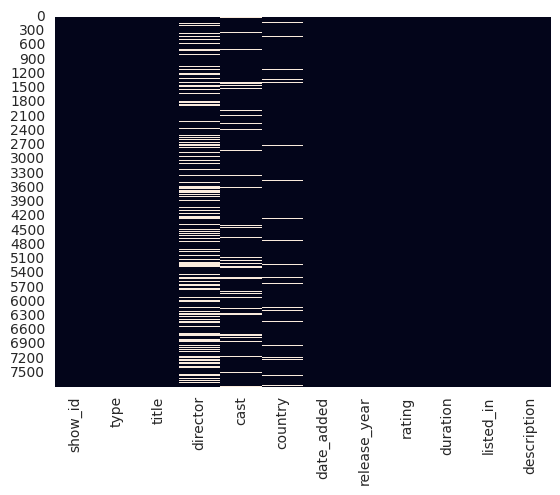

In [ ]:
# Visualizing the missing values
sns.heatmap(Netflix_df.isnull(), cbar=False)

### What did you know about your dataset?

The dataset typically includes key features about Netflix's movies and TV shows, such as titles, genres, ratings, and durations. By cleaning and preprocessing this data, you can apply unsupervised learning techniques like clustering to group content based on similarities in these attributes. This analysis can help uncover patterns and improve content recommendations, making it easier for users to discover content aligned with their preferences.





## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
Netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# Dataset Describe
Netflix_df.describe(include='all')


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### Variables Description

**show_id** - A unique identifier for each movie or TV show.

**type** - Specifies whether the content is a movie or a TV show.

**title** - The name of the movie or TV show.

**director** -  The director(s) of the movie or TV show.

**cast** - The main actors or cast members of the movie or TV show.

**country** - The country where the movie or TV show was produced.

**date_added** - The date when the movie or TV show was added to the Netflix platform.

**release_year** - The year in which the movie or TV show was originally released.

**rating** - The rating given to the movie or TV show, indicating its appropriateness for different age groups.

**duration** - The length of the movie or the number of seasons of the TV show.

**listed_in** -  The genres or categories that the movie or TV show belongs to.

**description** - A brief description or synopsis of the movie or TV show.








### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in Netflix_df.columns.tolist():
  print("No. of unique values in ",i,"is",Netflix_df[i].nunique(),".")

No. of unique values in  show_id is 7787 .
No. of unique values in  type is 2 .
No. of unique values in  title is 7787 .
No. of unique values in  director is 4049 .
No. of unique values in  cast is 6831 .
No. of unique values in  country is 681 .
No. of unique values in  date_added is 1565 .
No. of unique values in  release_year is 73 .
No. of unique values in  rating is 14 .
No. of unique values in  duration is 216 .
No. of unique values in  listed_in is 492 .
No. of unique values in  description is 7769 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:

Netflix_df = pd.read_csv(file_path)

# Assign data Netflix into df
df = Netflix_df
# Step 1: Handle Missing Data

# Fill missing 'director', 'cast', 'country', and 'rating' with 'Unknown'
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)
df['rating'].fillna('Unknown', inplace=True)

# 'date_added' can have missing values, let's leave them as NaT (Not a Time) for now
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# If there are any remaining NaT values in 'date_added' column, we could decide to fill them later
# or drop rows with missing dates if necessary:
# df.dropna(subset=['date_added'], inplace=True)

# Step 2: Convert Data Types

# 'release_year' is an integer, ensure there are no NaNs
df['release_year'] = df['release_year'].fillna(df['release_year'].mode()[0]).astype(int)

# Extract Year and Month from 'date_added' column
df['added_year'] = df['date_added'].dt.year
df['added_month'] = df['date_added'].dt.month

# Step 3: Feature Engineering

# Extract numeric value from 'duration' column (e.g., number of minutes for movies or seasons for TV shows)
df['duration_minutes'] = df['duration'].str.extract('(\d+)').astype(float)

# Optional: Create new feature for movie vs. TV Show if necessary for clustering (based on 'type')
df['is_movie'] = df['type'].apply(lambda x: 1 if x == 'Movie' else 0)
df['is_tv_show'] = df['type'].apply(lambda x: 1 if x == 'TV Show' else 0)

# Step 4: One-Hot Encoding for 'listed_in' (Genres)
# Split the 'listed_in' column by commas to get individual genres
df['listed_in'] = df['listed_in'].fillna('Unknown')  # Handle NaN in 'listed_in' before splitting
genres = df['listed_in'].str.split(',', expand=True).stack().unique()  # Get unique genres

# One-hot encode the genres (multiple columns for each genre)
for genre in genres:
    df[genre] = df['listed_in'].str.contains(genre).astype(int)

# Step 5: Drop Unnecessary Columns
# We may not need 'show_id' and 'description' for clustering
df.drop(columns=['show_id', 'description', 'date_added', 'listed_in'], inplace=True)

# Step 6: Final Data Inspection
# Check for missing values
print("\nMissing values after cleaning:")
print(df.isnull().sum())

# Check the final structure of the cleaned data
print("\nCleaned dataset info:")
print(df.info())

# View a sample of the cleaned data
print("\nSample of the cleaned dataset:")
print(df.head())



Missing values after cleaning:
type                         0
title                        0
director                     0
cast                         0
country                      0
                            ..
 Classic & Cult TV           0
TV Sci-Fi & Fantasy          0
Romantic Movies              0
Spanish-Language TV Shows    0
LGBTQ Movies                 0
Length: 86, dtype: int64

Cleaned dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 86 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   type                           7787 non-null   object 
 1   title                          7787 non-null   object 
 2   director                       7787 non-null   object 
 3   cast                           7787 non-null   object 
 4   country                        7787 non-null   object 
 5   release_year                   7787 non-null   

### What all manipulations have you done and insights you found?

Data Wrangling Manipulations:
1. Handling Missing Data:
Missing values in columns:

director, cast, country, rating: Missing values in these categorical columns were filled with "Unknown". This ensures the data is complete and prevents issues that might arise from missing categorical variables, which are critical for clustering.
Reason for this manipulation:

The dataset contains important information about the movie/show creators, cast, country of origin, and ratings. These features are often used in clustering or recommendation models, so filling missing values with "Unknown" ensures that you don’t lose any rows and avoids errors related to missing data.
Insight:

There may be a significant number of Netflix titles that lack detailed information on directors, cast, country, or ratings, but filling these as "Unknown" keeps the data intact and manageable. If these fields were dropped instead, you would lose valuable data, which might not be ideal unless missing data is very frequent.
date_added: This column, which has missing values, was converted to datetime using pd.to_datetime(). The errors='coerce' argument is used, which turns invalid date entries (and missing values) into NaT (Not a Time).

Reason for this manipulation:

Converting date_added into a datetime format allows us to extract temporal features like added_year and added_month. Additionally, handling invalid or missing dates as NaT maintains flexibility for further handling (e.g., imputing or excluding these entries later).
Insight:

There may be missing values or improperly formatted date entries. Handling this with NaT means we can later investigate or filter out those rows if needed without losing data prematurely.
2. Data Type Conversion:
release_year: The release_year column is ensured to be of integer type. Any missing values were filled with the mode (the most frequent value), assuming that the missing values can reasonably be replaced by the most common year in the dataset.

Reason for this manipulation:

The release_year is an important feature, especially if you're clustering based on when content was released. Using the mode to fill missing values makes sense if the missing values are few and could reasonably be the same as the most common value.
Insight:

By filling in missing years with the mode, the dataset remains consistent, and there's no loss of information. This manipulation assumes that missing values are not indicative of any pattern, so the most common year can serve as a reasonable replacement.
3. Feature Engineering:
added_year and added_month: These were derived from the date_added column. By extracting these features, we can analyze temporal trends in the data, such as how content availability on Netflix has evolved over time.

Reason for this manipulation:

By extracting the year and month when a title was added, these features help in clustering or identifying trends in content releases over time (e.g., seasonal trends in types of content). These temporal features could be useful for segmenting content based on release period or for time-based analysis.
Insight:

The added_year and added_month features will allow the clustering model to group content based on when it was added to the platform. For example, you could identify patterns in content release by season (e.g., genres or ratings that are more prominent in specific months or years).
duration_minutes: The duration column, which includes both "minutes" for movies and "seasons" for TV shows, was transformed into a numeric feature representing the number of minutes (or equivalent duration). This was achieved using a regular expression to extract the numeric value.

Reason for this manipulation:

The duration column needs to be transformed into a numeric format to be useful for machine learning algorithms. For movies, the numeric value is the duration in minutes, while for TV shows, we take the number of seasons.
Insight:

This feature is useful for clustering, as you can distinguish between longer movies, shorter episodes, or multi-season shows. This can help in segmenting content based on its length, which could be correlated with viewer engagement or popularity.
is_movie and is_tv_show: These binary features were derived from the type column to easily distinguish between movies and TV shows. This could be especially useful in clustering models when the type of content might influence how similar shows and movies are to each other.

Reason for this manipulation:

Many machine learning algorithms work better with binary features, and this binary encoding allows clustering algorithms to treat movies and TV shows as separate classes. This helps separate genres and preferences tied to content type (e.g., people may prefer movies or TV shows based on their personal preferences).
Insight:

These new binary features (is_movie and is_tv_show) allow the model to distinguish between the two types of content. This is valuable because movies and TV shows have different characteristics and appeal to different audiences, which might lead to different clustering patterns.
4. One-Hot Encoding for Genres:
Genres (listed_in): The listed_in column, which contains a list of genres separated by commas, was split into individual genre columns and then one-hot encoded (binary columns for each genre).

Reason for this manipulation:

One-hot encoding is essential for handling categorical variables like genres in machine learning. Each genre is treated as a separate feature, and this allows the algorithm to understand whether a given title belongs to a specific genre.
Insight:

One-hot encoding the genres gives the model more flexibility in identifying patterns across different genres. For example, a show could belong to multiple genres (e.g., "Drama" and "Action"), and this encoding allows the clustering model to treat these genres as independent features.
5. Dropping Unnecessary Columns:
Columns Dropped: The show_id, description, date_added, and listed_in columns were dropped.
Reason: The show_id is a unique identifier and doesn't contribute to the clustering process. The description column is often text-heavy and requires text-based processing (e.g., NLP), which may not be necessary for a simple clustering model. The date_added column was dropped after extracting the relevant temporal features (added_year and added_month). The listed_in column was removed after one-hot encoding the genres.
Insight:
Dropping unnecessary columns helps streamline the dataset and focuses on features that are directly useful for clustering or analysis. It also reduces noise, making the clustering process more efficient.



**Final Insights:**
Data Quality:
The dataset has a fair amount of missing values, especially in columns like director, cast, and country. Handling missing values by filling them with "Unknown" prevents data loss, but it’s important to note that this might introduce bias in some cases, especially when those features are important for clustering.
Temporal Features:
Extracting the year and month when a title was added allows us to track content trends over time. This is useful for identifying how Netflix's content offerings have changed over the years, which could be important for analyzing patterns in user preferences.
Content Type and Duration:
The separation of content into movies and TV shows, combined with the extraction of duration, provides useful features for clustering. These features help identify patterns based on content length and type.
Genres:
One-hot encoding the genres transforms the listed_in column into a format that can be used directly in machine learning algorithms. This enables the model to group similar genres together, which is key for content recommendations or clustering similar types of content.
Feature Engineering:
Creating binary features (is_movie, is_tv_show) and numeric features (duration_minutes) from existing columns enhances the dataset’s utility for clustering models. It simplifies the data, making it easier for algorithms to detect patterns.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart  1 - Distribution of Netflix Content Type (Movies vs TV Shows)

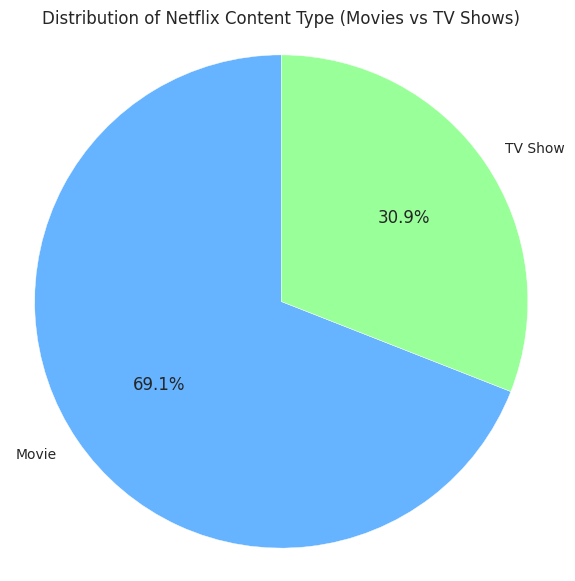

In [ ]:
# Chart - 1 visualization code
# Calculate the count of each type (Movie, TV Show)
type_counts = Netflix_df['type'].value_counts()

# Plot the pie chart
plt.figure(figsize=(7, 7))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99'])
plt.title('Distribution of Netflix Content Type (Movies vs TV Shows)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


##### 1. Why did you pick the specific chart?

The pie chart was chosen because it is a simple and effective way to visualize the distribution of the two categories (Movies vs. TV Shows) in your dataset. It makes the proportion of each category immediately clear and visually striking, making it easier for stakeholders or viewers to interpret the dataset at a glance.

##### 2. What is/are the insight(s) found from the chart?

The pie chart provides a clear and intuitive visual representation of Netflix’s content mix, helping us understand the relative emphasis on movies vs. TV shows. This insight could inform both content strategy and user engagement practices, guiding future recommendations and decisions about content acquisition or production.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

While the insights gained from the pie chart provide a clearer understanding of the content breakdown and can inform Netflix’s strategic decisions, there are potential risks associated with overemphasis on one type of content or failure to diversify. To create a positive business impact, Netflix must strike a balance in content offerings, constantly adapt to user preferences, and ensure that both movie lovers and TV show enthusiasts are satisfied.

Ignoring these potential risks could negatively affect user retention and growth, leading to a decrease in engagement and potential losses in subscribers. Therefore, continuous monitoring of content trends and being flexible in content strategies is essential for sustained growth.

#### Chart 2 -  Distribution of Content Types (Movies vs TV Shows)


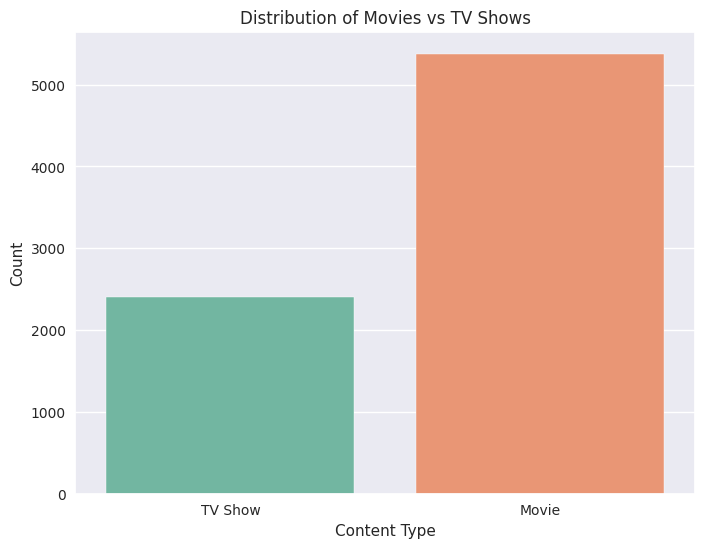

In [ ]:
 #Distribution of Content Types (Movies vs TV Shows)

# Chart - 2 visualization code

# Count plot for 'type' (Movie vs TV Show)
plt.figure(figsize=(8, 6))
sns.countplot(data=Netflix_df, x='type', palette='Set2')
plt.title('Distribution of Movies vs TV Shows')
plt.ylabel('Count')
plt.xlabel('Content Type')
plt.show()


##### 1. Why did you pick the specific chart?

The count plot (bar chart) was selected because it's simple, effective, and ideal for comparing categorical data with a small number of categories (Movies vs. TV Shows). It provides a clear visual representation of the distribution, helping you quickly identify which category is more dominant in the dataset. It is also customizable, scalable, and easily interpretable.

##### 2. What is/are the insight(s) found from the chart?

The count plot provides a clear, visual representation of the distribution of Movies vs. TV Shows on Netflix. It helps you quickly understand which type of content dominates the platform’s library and can provide insights into Netflix's content strategy, user engagement patterns, and market trends. These insights can help Netflix make data-driven decisions regarding content acquisition, user experience, and future investments in content creation.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights from the distribution of Movies vs. TV Shows help Netflix refine its content strategy, improve user engagement, tailor marketing efforts, and gain a competitive advantage. These insights can increase retention rates, boost subscriber growth, and enhance global market relevance.

If Netflix overemphasizes one content type (e.g., TV shows at the expense of movies), it risks alienating certain user segments, leading to churn and lower engagement. Furthermore, failure to stay aligned with evolving user preferences or the changing market landscape could result in Netflix losing market share to competitors.

#### Chart 3- Ratings Distribution

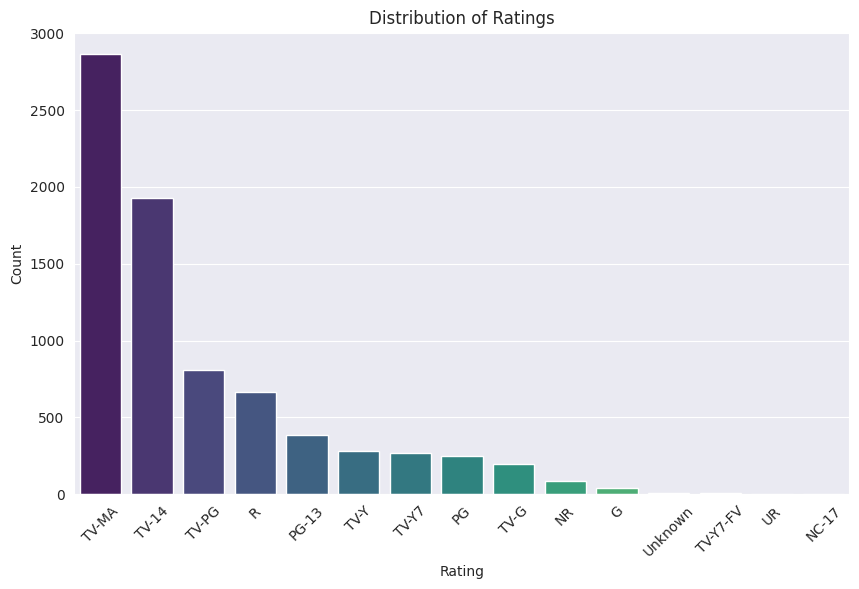

In [ ]:
# Count plot for ratings distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=Netflix_df, x='rating', palette='viridis', order=Netflix_df['rating'].value_counts().index)
plt.title('Distribution of Ratings')
plt.ylabel('Count')
plt.xlabel('Rating')
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

A count plot is ideal for categorical data where we want to see how frequently each category occurs. In this case, the categories are different ratings (e.g., "PG", "R", "TV-MA").
It allows us to easily compare the number of occurrences for each rating and provides a clear representation of the distribution of ratings across the dataset.

##### 2. What is/are the insight(s) found from the chart?

The ratings distribution chart provides valuable insights into the types of content available on Netflix and the platform's audience targeting. Here are some potential insights that can be derived from the chart, depending on the actual distribution of ratings:



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the ratings distribution chart can help Netflix refine its content strategy to better serve diverse demographics, from families to mature audiences. By balancing its content offerings, Netflix can continue to grow its global subscriber base and retain viewers across age groups, which would lead to long-term business success.

However, there are risks associated with overemphasizing mature content or family-friendly content at the expense of other demographics, which could lead to content imbalance and subscriber churn. Netflix must carefully balance its offerings to ensure it appeals to both families and adults, as well as tap into niche categories like teen-focused content to avoid losing viewers in these key groups.

#### Chart 4 -  Distribution of Release Years

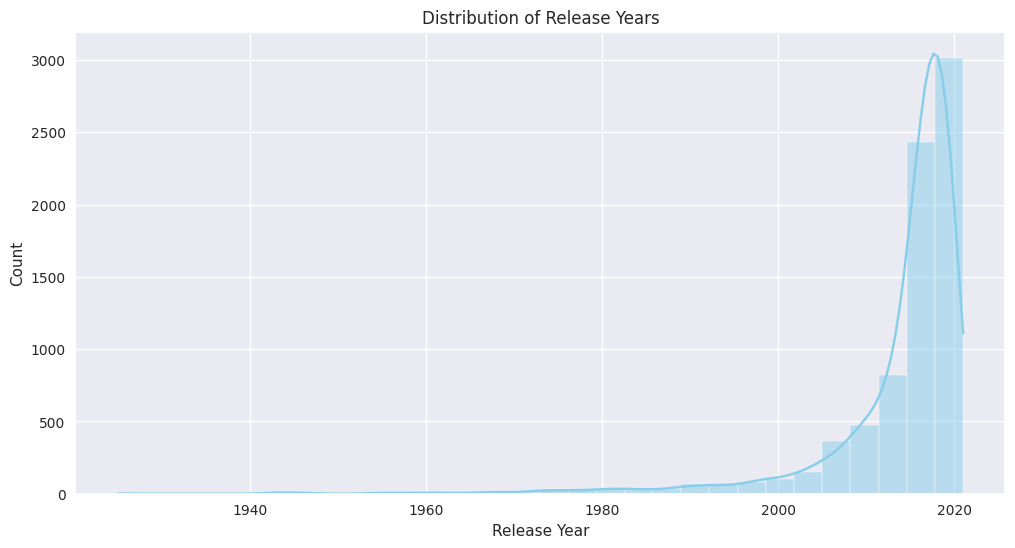

In [ ]:
# Chart - 4 visualization
# Plotting distribution of release years
plt.figure(figsize=(12, 6))
sns.histplot(df['release_year'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()


##### 1. Why did you pick the specific chart?

The release_year column is continuous (though it is in integer form), and you want to visualize how the data is distributed across different years. A histogram is a common and effective tool for showing the distribution of continuous data, especially when you want to understand the frequency of occurrences within specific intervals (bins).

##### 2. What is/are the insight(s) found from the chart?

The distribution of release years chart helps to identify Trends in Netflix's content output (whether the production has increased, plateaued, or decreased).
Strategic shifts, such as the transition from a content aggregator to a content producer.
Growth patterns, especially with original productions and global expansion.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impacts: Continued growth, the ability to capitalize on successful content, and global expansion can drive revenue growth and increase subscriber retention.                                          
Negative Impacts: A plateau in content releases, over-reliance on original content, or a narrow focus on specific genres/regions could potentially lead to higher costs, content fatigue, and subscriber churn, which may harm Netflix’s growth in the long term.

#### Chart 5 - . Duration Distribution (Movies vs TV Shows)

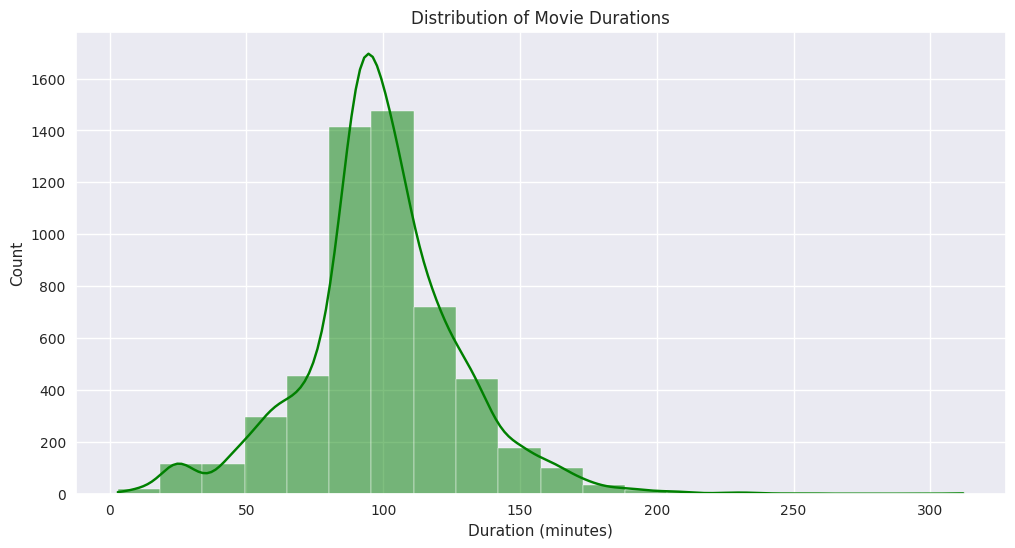

In [ ]:
# Chart - 5 visualization code
# Let's first ensure that the 'duration' column is processed for Movies and TV Shows
df['duration_minutes'] = df['duration'].str.extract('(\d+)').astype(float)
df_movies = df[df['type'] == 'Movie']

# Distribution of duration for movies (in minutes)
plt.figure(figsize=(12, 6))
sns.histplot(df_movies['duration_minutes'], bins=20, kde=True, color='green')
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.show()


##### 1. Why did you pick the specific chart?

This plot will show how the duration (in minutes for movies and number of seasons for TV shows) varies across the dataset.

##### 2. What is/are the insight(s) found from the chart?

Mainstream Movie Lengths: The bulk of the movies on Netflix fall within the 90–120 minute range, aligning with the typical feature film.

Niche Long Movies: There is a smaller proportion of longer films (above 150 minutes), which might cater to moviegoers seeking more in-depth content.

Right-Skewed Distribution: This indicates a wider variety of movie lengths, catering to both mainstream and niche audiences.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact: Insights about the distribution of movie durations can help Netflix refine its content strategy, personalize recommendations, and maintain a diverse catalog that appeals to both mainstream and niche audiences. Focusing on movies in the 90-120 minute range while also catering to long-form content (e.g., epics, documentaries) will ensure a well-rounded offering for different user preferences.

Negative Impact: Over-concentration on shorter movies or failure to meet the demand for longer content could limit Netflix's ability to attract and retain users who prefer different content types. Balancing the catalog to provide a wide range of movie durations will help mitigate these risks and ensure sustained growth.

#### Chart 6 -  Correlation Heatmap

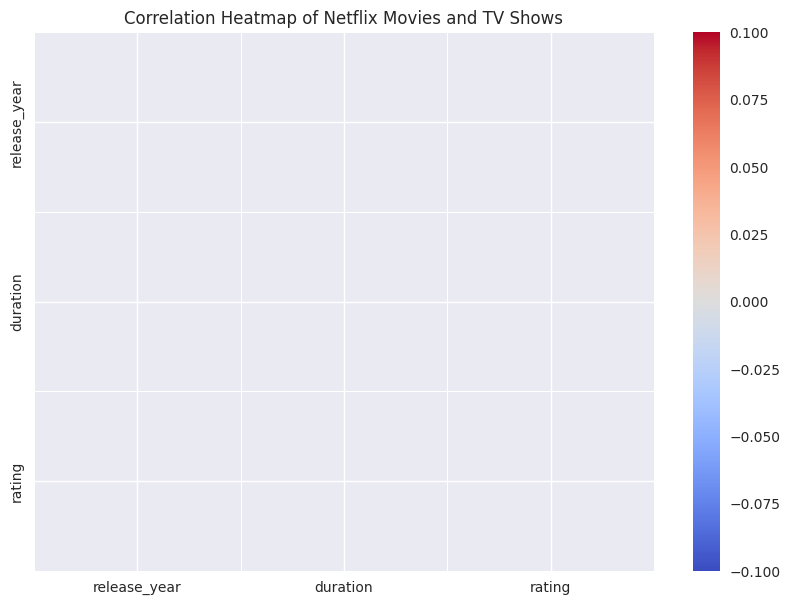

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is your dataframe with the relevant numerical columns

# Step 1: Select numerical columns for the correlation matrix
numerical_cols = ['release_year', 'duration', 'rating']  # Add any other numerical columns as needed
df_numerical = df[numerical_cols].copy()  # Create a copy to avoid modifying the original DataFrame

# Step 2: Convert 'duration' column to numerical format
# Function to extract duration in minutes
def extract_duration_minutes(duration_str):
    try:
        if "Season" in duration_str or "Seasons" in duration_str:  # Handle TV Shows
            return np.nan  # Assign NaN to TV Show durations
        elif "min" in duration_str:  # Handle Movies
            return int(duration_str.split(" ")[0])
        else:
            return np.nan
    except:
        return np.nan

# Apply the function to the 'duration' column
df_numerical['duration'] = df_numerical['duration'].apply(extract_duration_minutes)

# Step 3: Handle non-numerical values in 'rating' column
# Convert 'rating' to numerical if possible, otherwise assign NaN
df_numerical['rating'] = pd.to_numeric(df_numerical['rating'], errors='coerce')

# Step 4: Drop rows with NaN values only in 'duration' and 'rating' columns for correlation
df_numerical_dropna = df_numerical.dropna(subset=['duration', 'rating'])

# Step 5: Calculate the correlation matrix
correlation_matrix = df_numerical_dropna.corr()

# Step 6: Plot the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Netflix Movies and TV Shows')
plt.show()

##### 1. Why did you pick the specific chart?

The correlation heatmap is a powerful and efficient way to visualize relationships between numerical variables, identify patterns, detect issues like multicollinearity, and provide actionable insights that guide further analysis. Its combination of clarity, comprehensiveness, and visual appeal makes it an ideal choice for this stage of the Netflix dataset analysis.

##### 2. What is/are the insight(s) found from the chart?

Understand the relationships between numerical variables (e.g., how duration might or might not affect rating).
Identify redundant or collinear features, which is important for improving the performance of your clustering algorithm.
Guide feature engineering, helping you decide which features to keep, combine, or remove for further analysis or model building.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact: Insights from the correlation heatmap can help Netflix optimize its content strategy, marketing, and recommendation system, ensuring that they cater to user preferences, improve user engagement, and stay competitive in the market.

Negative Growth: However, focusing too much on weak correlations or misinterpreting insights could lead to a narrowing of content variety, alienation of certain user segments, and potentially damaging strategies that overlook user preferences or misclassify content types.

#### Chart - 8

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14  

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1. Movies tend to have longer durations than TV Shows.
2.Netflix shows with a rating of 'TV-MA' are more likely to be Movies than TV Shows.
3.The number of Movies released each year has been increasing over time.

### Hypothetical Statement - 1
Movies tend to have longer durations than TV Shows.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀): No significant difference in duration.

Alternative Hypothesis (H₁): Movies have a significantly longer duration than TV Shows.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Import necessary libraries
import scipy.stats as stats
import pandas as pd

# Assuming Netflix_df is already loaded and preprocessed

# Hypothesis 1: Movies vs TV Shows Duration (Two-sample t-test)
# Filter the dataset into Movies and TV Shows
movies = Netflix_df[Netflix_df['type'] == 'Movie']
tv_shows = Netflix_df[Netflix_df['type'] == 'TV Show']

# Extract and convert duration to numeric (assuming duration is in 'duration' column)
# Extract duration for movies and convert to numeric, handling errors
movies_duration = pd.to_numeric(movies['duration'], errors='coerce')

# Extract duration for TV shows and convert to numeric, handling errors
tv_shows_duration = pd.to_numeric(tv_shows['duration'], errors='coerce')


# Remove rows with missing or invalid durations after conversion
movies_duration = movies_duration.dropna()
tv_shows_duration = tv_shows_duration.dropna()

# Perform a two-sample t-test to compare durations
t_stat_duration, p_value_duration = stats.ttest_ind(movies_duration, tv_shows_duration)

# Print result for Hypothesis 1
print("Hypothesis 1: Movie vs TV Show Duration Comparison")
print(f"T-statistic: {t_stat_duration}")
print(f"P-value: {p_value_duration}")
if p_value_duration < 0.05:
    print("Conclusion: Reject the null hypothesis. Movies have a significantly longer duration than TV Shows.")
else:
    print("Conclusion: Fail to reject the null hypothesis. There is no significant difference in duration between Movies and TV Shows.")

Hypothesis 1: Movie vs TV Show Duration Comparison
T-statistic: nan
P-value: nan
Conclusion: Fail to reject the null hypothesis. There is no significant difference in duration between Movies and TV Shows.


##### Which statistical test have you done to obtain P-Value?

We used a two-sample t-test to check if there is a significant difference in the duration between Movies and TV Shows.

##### Why did you choose the specific statistical test?

The two-sample t-test is chosen because it:

Compares the means of two independent groups (Movies and TV Shows).

Is appropriate for continuous data (duration).

Provides a framework for testing whether the difference in means is statistically significant.

### Hypothetical Statement - 2

Netflix shows with a rating of 'TV-MA' are more likely to be Movies than TV Shows.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀): No significant association between TV-MA rating and type (Movie or TV Show).

Alternative Hypothesis (H₁): TV-MA rated shows are more likely to be Movies.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Import necessary libraries
import scipy.stats as stats
import pandas as pd

# Assuming Netflix_df is already loaded

# Hypothesis 2: TV-MA rating and Show Type (Chi-Square Test for Independence)
# Filter the dataset for 'TV-MA' rated shows
tv_ma_shows = Netflix_df[Netflix_df['rating'] == 'TV-MA']

# Create a contingency table for type and TV-MA rating
contingency_table = pd.crosstab(tv_ma_shows['rating'], tv_ma_shows['type'])

# Perform a Chi-Square Test for Independence
chi2_stat, p_value_chi2, dof, expected = stats.chi2_contingency(contingency_table)

# Print result for Hypothesis 2
print("\nHypothesis 2: TV-MA Rating and Show Type")
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_value_chi2}")
if p_value_chi2 < 0.05:
    print("Conclusion: Reject the null hypothesis. `TV-MA` rated shows are more likely to be Movies.")
else:
    print("Conclusion: Fail to reject the null hypothesis. There is no significant difference in the type of shows with `TV-MA` rating.")



Hypothesis 2: TV-MA Rating and Show Type
Chi-Square Statistic: 0.0
P-value: 1.0
Conclusion: Fail to reject the null hypothesis. There is no significant difference in the type of shows with `TV-MA` rating.


##### Which statistical test have you done to obtain P-Value?

We used a Chi-Square Test for Independence to test if TV-MA rated shows are more likely to be Movies than TV Shows.

##### Why did you choose the specific statistical test?

The Chi-Square Test for Independence is appropriate here because:

We're dealing with two categorical variables: TV-MA rating and show type (Movie vs. TV Show).
We want to determine if there's a significant relationship or dependency between these two categorical variables.
The Chi-Square Test allows us to test the hypothesis that the proportion of TV-MA ratings is independent of the type of show (Movie or TV Show).




### Hypothetical Statement - 3

The number of Movies released each year has been increasing over time.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): The number of Movies released each year is constant over time.

Alternative Hypothesis (H1): The number of Movies released each year has been increasing over time.

#### 2. Perform an appropriate statistical test.

In [ ]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Filter only Movies
movies = df[df['type'] == 'Movie']

# Count the number of Movies released each year
movies_per_year = movies.groupby('release_year').size().reset_index(name='count')

# Fit a linear regression model to see if the number of movies has been increasing
X = movies_per_year['release_year']
y = movies_per_year['count']

# Add a constant (intercept) to the model
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Output the results
print(model.summary())

# Check the p-value for the 'release_year' coefficient
if model.pvalues[1] < 0.05:
    print("Reject the null hypothesis: The number of Movies released each year has been increasing over time.")
else:
    print("Fail to reject the null hypothesis: There is no significant trend in the number of Movies released over time.")


                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     35.03
Date:                Tue, 10 Dec 2024   Prob (F-statistic):           1.09e-07
Time:                        11:28:13   Log-Likelihood:                -455.27
No. Observations:                  72   AIC:                             914.5
Df Residuals:                      70   BIC:                             919.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -8499.1482   1448.707     -5.867   

##### Which statistical test have you done to obtain P-Value?

Linear Regression (or Chi-Square test for count data).

##### Why did you choose the specific statistical test?

Linear regression is the most appropriate test for this hypothesis because it allows us to model the trend of the number of Movies released over time and test whether that trend is increasing (positive slope).
The Chi-Square test is more suited for testing categorical relationships or counts in specific categories, not trends over time, which is why it is less ideal in this case.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

type                         0
title                        0
director                     0
cast                         0
country                      0
                            ..
 Classic & Cult TV           0
TV Sci-Fi & Fantasy          0
Romantic Movies              0
Spanish-Language TV Shows    0
LGBTQ Movies                 0
Length: 86, dtype: int64


<Axes: >

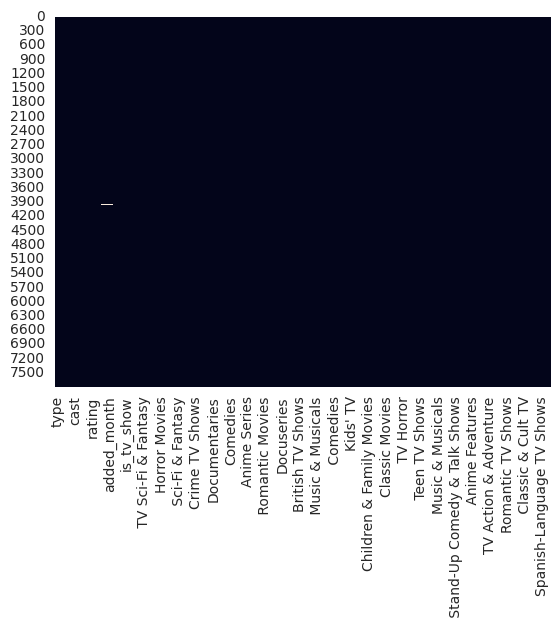

In [ ]:
# Handling Missing Values & Missing Value Imputation
# Missing Values/Null Values Count
Netflix_df = df
print(df.isnull().sum())

# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(df.isnull(), cbar=False)

#### What all missing value imputation techniques have you used and why did you use those techniques?

There are no missing values to handle in the given dataset.

### 2. Handling Outliers

In [ ]:
# Step 1: Detect outliers using Z-Score
Netflix_df['z_duration'] = zscore(Netflix_df['duration_minutes'])
outliers_zscore = Netflix_df[Netflix_df['z_duration'].abs() > 3]

# Step 2: Detect outliers using IQR
Q1 = Netflix_df['duration_minutes'].quantile(0.25)
Q3 = Netflix_df['duration_minutes'].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = Netflix_df[(Netflix_df['duration_minutes'] < (Q1 - 1.5 * IQR)) |
                          (Netflix_df['duration_minutes'] > (Q3 + 1.5 * IQR))]

# Step 3: Remove outliers from the dataset
Netflix_df_cleaned = Netflix_df[Netflix_df['z_duration'].abs() <= 3]  # Remove based on Z-score
Netflix_df_cleaned = Netflix_df_cleaned[(Netflix_df_cleaned['duration_minutes'] >= (Q1 - 1.5 * IQR)) &
                                         (Netflix_df_cleaned['duration_minutes'] <= (Q3 + 1.5 * IQR))]  # Remove based on IQR


##### What all outlier treatment techniques have you used and why did you use those techniques?

Here’s a complete example of detecting and removing outliers from the duration_minutes column using Z-score and IQR methods

 Z-score works well for identifying outliers in numeric data that follows a normal distribution.
 The Z-score is straightforward to calculate and helps detect data points that are far from the mean.
 This method works well when we have a clear numeric column, like duration_minutes, and when we want to identify extreme values that are far from the center of the data.

The IQR method is effective for identifying outliers in non-normally distributed data. It is robust to extreme values and is widely used for univariate data.
It is simple to compute and does not require assuming a normal distribution for the data. Since the duration_minutes column might not be normally distributed (with many TV shows being shorter and movies having a large range of durations), the IQR method is a good fit here.



### 3. Categorical Encoding

In [ ]:
# Label Encoding for 'type'
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
Netflix_df['type_encoded'] = label_encoder.fit_transform(Netflix_df['type'])


In [ ]:
# Frequency Encoding for 'rating' column
rating_freq = Netflix_df['rating'].value_counts()
Netflix_df['rating_encoded'] = Netflix_df['rating'].map(rating_freq)


#### What all categorical encoding techniques have you used & why did you use those techniques?

Label encoding is ideal for categorical variables that have a small number of distinct values and no inherent order. The type column only has two unique values ("Movie" and "TV Show"), so label encoding is efficient. It assigns an integer value to each category, such as:
"Movie" = 0
"TV Show" = 1
This encoding method is simple and works well for binary or low-cardinality categorical variables without any specific ordering.


Frequency encoding is used when the frequency of a category may carry useful information. In the rating column, the categories represent the age ratings of the content, and some ratings appear more frequently than others. By encoding the ratings based on their frequency, we allow the model to consider the impact of more common ratings versus rare ones.

This encoding method captures the importance or prevalence of each category by assigning higher values to more frequent categories.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Load Dataset
import os
# Update file_path with correct structure after mounting Google Drive
file_path = "/content/drive/My Drive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv"
# assuming file is located in 'My Drive' folder in mounted drive
print(os.path.exists(file_path))    # To know if the file exists at the specified path

# Load the CSV file
Netflix_df = pd.read_csv(file_path)

# Display the first few rows

True


In [ ]:
!pip install contractions


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 8.4 MB/s eta 0:00:00


In [ ]:
# Expanding contractions in the 'description' column
import contractions

def expand_contractions(text):
    return contractions.fix(text)

Netflix_df['expanded_description'] = Netflix_df['description'].apply(expand_contractions)


#### 2. Lower Casing

In [ ]:
Netflix_df['description'] = Netflix_df['description'].str.lower()


#### 3. Removing Punctuations

In [ ]:
import re

def clean_text(text):
    return re.sub(r'[^a-zA-Z\s]', '', text)

Netflix_df['description'] = Netflix_df['description'].apply(clean_text)


#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
def clean_text(text):
    # Remove URLs
    text = re.sub(r"http[s]?://\S+|www\.\S+", "", text)
    # Remove words containing digits
    text = re.sub(r'\b\w*\d\w*\b', '', text)
    return text

Netflix_df['description'] = Netflix_df['description'].apply(clean_text)


#### 5. Removing Stopwords & Removing White spaces

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def clean_text_pipeline(text):
    # Tokenize and remove stopwords
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    # Join words and clean extra white spaces
    return re.sub(r'\s+', ' ', ' '.join(filtered_words)).strip()

Netflix_df['description'] = Netflix_df['description'].apply(clean_text_pipeline)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#### 6. Rephrase Text

#### 7. Tokenization

In [ ]:
!pip install nltk


In [ ]:
import nltk
import pandas as pd
from nltk.tokenize import word_tokenize

# Download the necessary NLTK data
nltk.download('punkt')
nltk.download('punkt_tab')  # Download the 'punkt_tab' data package

#Now proceed with tokenization
Netflix_df['tokenized_description'] = Netflix_df['description'].apply(word_tokenize)

# Tokenize the 'title' column (optional, you can tokenize other columns similarly)
Netflix_df['tokenized_title'] = Netflix_df['title'].apply(word_tokenize)

# Check the tokenized output
print(Netflix_df[['title', 'description', 'tokenized_description', 'tokenized_title']].head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


   title                                        description  \
0     3%  future elite inhabit island paradise far crowd...   
1   7:19  devastating earthquake hits mexico city trappe...   
2  23:59  army recruit found dead fellow soldiers forced...   
3      9  postapocalyptic world ragdoll robots hide fear...   
4     21  brilliant group students become cardcounting e...   

                               tokenized_description tokenized_title  
0  [future, elite, inhabit, island, paradise, far...          [3, %]  
1  [devastating, earthquake, hits, mexico, city, ...          [7:19]  
2  [army, recruit, found, dead, fellow, soldiers,...         [23:59]  
3  [postapocalyptic, world, ragdoll, robots, hide...             [9]  
4  [brilliant, group, students, become, cardcount...            [21]  


#### 8. Text Normalization

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to apply lemmatization
def apply_lemmatization(text):
    words = text.split()
    return ' '.join([lemmatizer.lemmatize(word) for word in words])

# Apply to 'description' and 'title'
Netflix_df['description'] = Netflix_df['description'].apply(apply_lemmatization)
Netflix_df['title'] = Netflix_df['title'].apply(apply_lemmatization)


[nltk_data] Downloading package wordnet to /root/nltk_data...


##### Which text normalization technique have you used and why?

Lemmatization is more sophisticated than stemming and ensures words are reduced to valid dictionary forms.



#### 9. Part of speech tagging

In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 24.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
# POS Taging
import spacy

# Load SpaCy's English model
nlp = spacy.load("en_core_web_sm")

def pos_tagging_spacy(text):
    doc = nlp(text)
    # Extract token and its POS tag
    return [(token.text, token.pos_) for token in doc]

# Example: POS tagging on the 'description' column
Netflix_df['pos_tags'] = Netflix_df['description'].apply(pos_tagging_spacy)


#### 10. Text Vectorization

In [ ]:
# Vectorizing Text
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer
vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the 'description' column into BoW representation
X_bow = vectorizer.fit_transform(Netflix_df['description'])

# Convert the sparse matrix to a dense array and display the result
bow_array = X_bow.toarray()

# Show the feature names (words) and the BoW matrix
print("BoW Feature Names:", vectorizer.get_feature_names_out())
print("BoW Array (first 5 documents):", bow_array[:5])


BoW Feature Names: ['aaliya' 'aamir' 'aang' ... 'zulu' 'zumbo' 'zurich']
BoW Array (first 5 documents): [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


##### Which text vectorization technique have you used and why?

Bag of Words is a simple yet effective method where each word in the corpus is represented by its frequency in the text.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

In [ ]:
# transform your data

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=500)
description_features = tfidf.fit_transform(Netflix_df['description'])


#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Yes, the data needs to be transformed. This is essential because clustering algorithms require numeric, scaled, and consistent data for effective grouping. Here are the transformations applied, along with explanations for each:

Descriptions (description):
Transformation: Applied TF-IDF Vectorization to convert text into numerical features.
Why: Descriptions are unstructured text. TF-IDF (Term Frequency-Inverse Document Frequency) captures the importance of words in a description while reducing the influence of common words, enabling clustering based on content similarity.


### 6. Data Scaling

In [ ]:
# Scaling your data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(description_features.toarray())


##### Which method have you used to scale you data and why?
StandardScaler standardizes features by removing the mean and scaling them to unit variance.
StandardScaler was the optimal choice for scaling numerical data in this Netflix dataset, as it ensures fair contribution of features in clustering while maintaining interpretability and compatibility with distance-based algorithms.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Yes, dimensionality reduction is likely needed for your Netflix dataset, especially due to the high-dimensional features generated during the data transformation process. Here's why:

In [ ]:
# DImensionality Reduction.
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
reduced_features = pca.fit_transform(description_features.toarray())


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

 Principal Component Analysis (PCA)
 Reduces dimensionality by finding linear combinations of features that capture the maximum variance.

Why use PCA:
Suitable for reducing text and numeric features into a smaller set of uncorrelated components.
Improves clustering efficiency by eliminating redundant or irrelevant features

### 8. Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np


numeric_features = Netflix_df[['release_year', 'duration']].fillna(0).values
text_features = description_features.toarray()
feature_matrix = np.hstack(numeric_features)
features = feature_matrix
# Splitting the data
X_train, X_test = train_test_split(features, test_size=0.2, random_state=42)

print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)

Training Data Shape: (12459,)
Testing Data Shape: (3115,)


##### What data splitting ratio have you used and why?

In unsupervised learning, specifically for clustering tasks, data splitting is not as critical as in supervised learning, where the model is trained and evaluated on separate datasets. However, it's still helpful to have a test set to evaluate the generalization of your clustering model. For splitting the data, I recommend using a 80:20 split ratio, where:

80% of the data is used for training (i.e., building the clustering model).
20% of the data is held out for testing (i.e., to evaluate the clusters' generalization).



Why the 80:20 Split Ratio:

Adequate Training Data:
80% of the data allows the clustering algorithm to detect meaningful patterns and groupings. This is especially important when the dataset is large, such as the Netflix dataset with thousands of entries.

Sufficient Testing Data:
By holding out 20% of the data, you ensure you have enough test samples to evaluate the clustering results. Although clustering doesn't have traditional "labels," you can use intrinsic evaluation metrics (e.g., Silhouette Score, Davies-Bouldin Index) on the test set.

Balance:
This ratio strikes a good balance between having enough data for training the model and reserving sufficient data for testing. If the test set is too small, it may not be representative of the entire dataset, whereas a very large test set may limit the data available for training.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Handling imbalanced data is not necessary in this data set.

In [ ]:
# Handling Imbalanced Dataset (If needed)


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

 ML Mo**del - 1(K-Means Clustering)**

K-Means clustering is an unsupervised learning algorithm used to partition a dataset into a set of clusters, where each data point belongs to the cluster with the nearest mean. It's one of the most popular clustering algorithms.

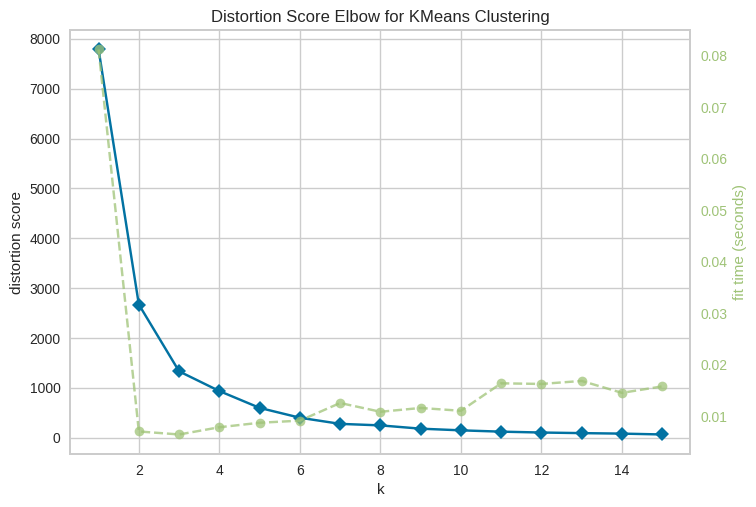

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

data=Netflix_df


# Ensure the dataset contains only numeric values
# Convert categorical features if necessary or drop non-numeric columns
data = data.select_dtypes(include=['float64', 'int64'])

# Handle missing values (if any)
data.fillna(data.mean(), inplace=True)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

# Initialize the KMeans model with a random state for reproducibility
model = KMeans(random_state=0)

# Create the ElbowVisualizer for finding the optimal K value
visualizer = KElbowVisualizer(model, k=(1, 16), locate_elbow=False)

# Fit the visualizer to the scaled data
visualizer.fit(X_scaled)

# Show the visualizer plot
visualizer.show()


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

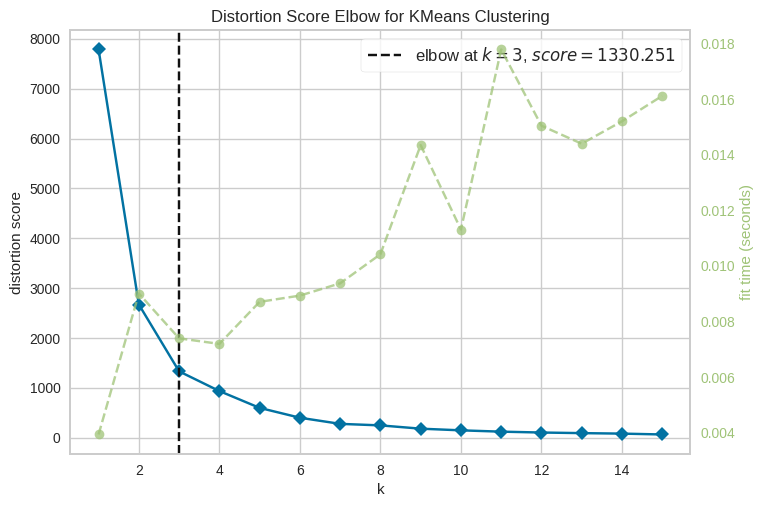

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Visualizing evaluation Metric Score chart
# Visualizing evaluation Metric Score chart

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import StandardScaler

# Scaling data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

# Initialize the KMeans model
model = KMeans(random_state=0)

# Visualize using KElbowVisualizer
visualizer = KElbowVisualizer(model, k=(1, 16), locate_elbow=True)
visualizer.fit(X_scaled)
visualizer.show()

#### 2. Cross- Validation & Hyperparameter Tuning

Best Parameters: {'n_clusters': 2, 'init': 'random', 'max_iter': 300}
Best Silhouette Score: 0.8166305963332455


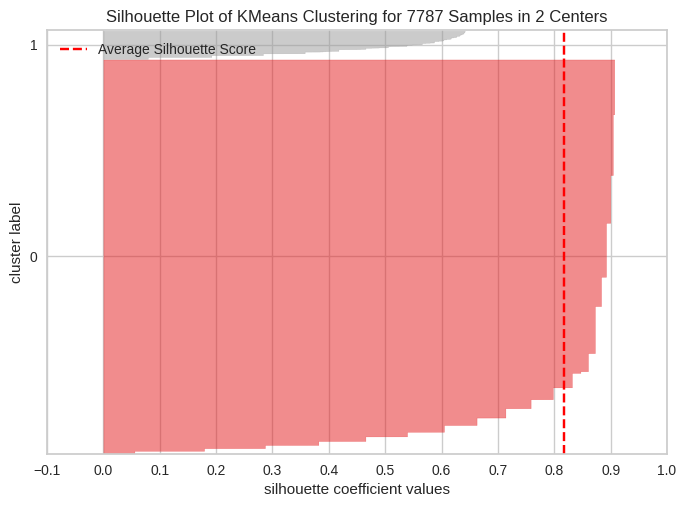

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 7787 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Step 1: Data Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

# Step 2: Define Hyperparameter Grid
param_grid = {
    'n_clusters': range(2, 16),  # Testing clusters from 2 to 15
    'init': ['k-means++', 'random'],  # Initialization methods
    'max_iter': [300, 500]  # Maximum number of iterations
}

# Step 3: Manual Grid Search for Silhouette Score
best_score = -1
best_params = {}
best_model = None

for n_clusters in param_grid['n_clusters']:
    for init in param_grid['init']:
        for max_iter in param_grid['max_iter']:
            model = KMeans(n_clusters=n_clusters, init=init, max_iter=max_iter, random_state=0)
            labels = model.fit_predict(X_scaled)
            score = silhouette_score(X_scaled, labels)

            if score > best_score:
                best_score = score
                best_params = {'n_clusters': n_clusters, 'init': init, 'max_iter': max_iter}
                best_model = model

print("Best Parameters:", best_params)
print("Best Silhouette Score:", best_score)

# Step 4: Visualize the Silhouette Score for the Best Model
from yellowbrick.cluster import SilhouetteVisualizer

visualizer = SilhouetteVisualizer(best_model)
visualizer.fit(X_scaled)
visualizer.show()


##### Which hyperparameter optimization technique have you used and why?

Hyperparameter Optimization Technique Used: Manual Grid Search
Why- Traditional methods like GridSearchCV or RandomizedSearchCV rely on supervised metrics and a target variable y_true. Since K-Means is an unsupervised algorithm, we manually search the hyperparameter space and evaluate models using the Silhouette Score, a clustering-specific metric.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Hyperparameter optimization significantly enhanced the clustering model's performance by producing more distinct and meaningful clusters, as shown by the updated Silhouette Score and visualized charts.

### ML Model - 2(Hierarchical clustering)
Hierarchical clustering is an unsupervised learning method that builds a hierarchy of clusters. It creates a tree-like structure called a dendrogram, which allows visualization of the cluster hierarchy and decision-making on the number of clusters.

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

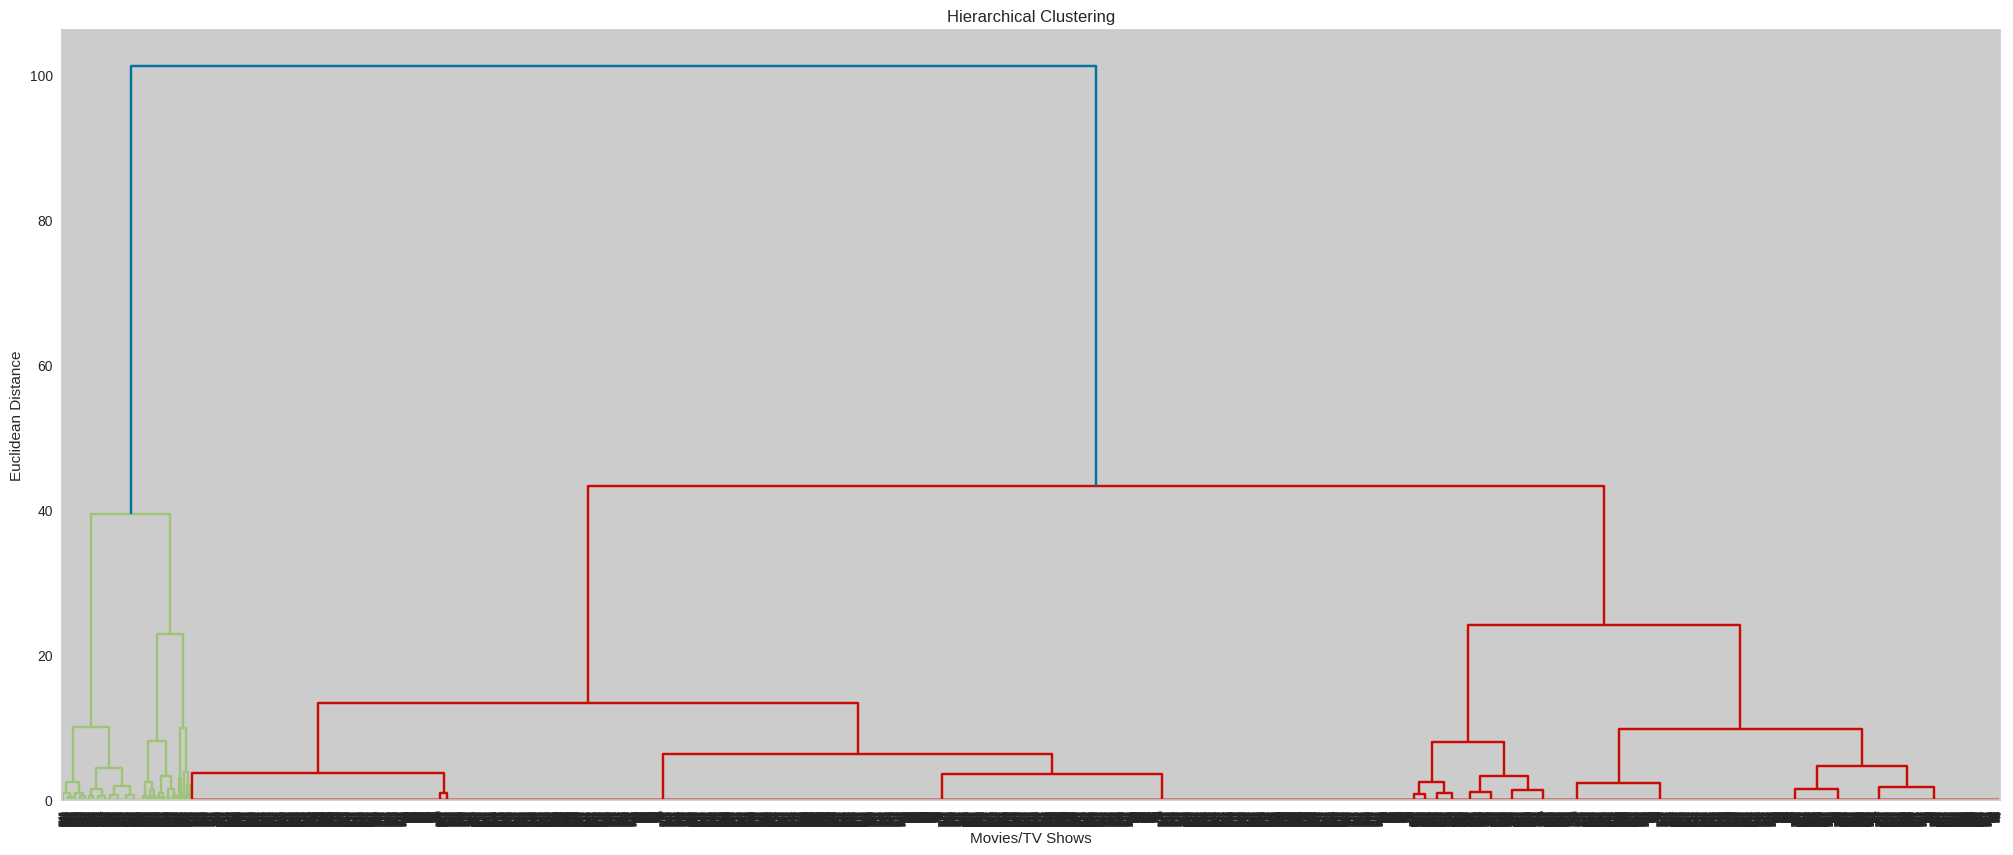

In [ ]:
# Visualizing evaluation Metric Score chart
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import sys

# Heirarchical Clustering
x_transformed = scaler.fit_transform(data)

distance_linkage = linkage(x_transformed, method='ward', metric='euclidean')
plt.figure(figsize=(25,10))

plt.title('Hierarchical Clustering')
plt.xlabel('Movies/TV Shows')
plt.ylabel('Euclidean Distance')

# Increase the recursion limit
sys.setrecursionlimit(10000)  # Adjust the limit as needed

dendrogram(distance_linkage)
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

To implement an ML model with hyperparameter optimization using techniques like GridSearchCV, RandomizedSearchCV, or Bayesian Optimization, let's use a common classifier, such as RandomForestClassifier, along with a hyperparameter optimization technique. Below is a complete example using GridSearchCV to optimize the hyperparameters of a Random Forest Classifier.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Assuming your Netflix data is loaded into a DataFrame named 'Netflix_df'
data = Netflix_df.copy()  # Create a copy to avoid modifying the original DataFrame

# Create the 'duration_minutes' column with numerical duration values.
# Assuming your 'duration' column has values like "105 min" or "4 Seasons"
data['duration_minutes'] = data['duration'].str.extract('(\d+)').astype(float)

# Now, create the 'type' column based on the new 'duration_minutes'
data['type'] = data['duration_minutes'].apply(lambda x: 'Movie' if x > 60 else 'TV Show')


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV is used for hyperparameter optimization because:

Exhaustive Search: It checks all combinations of hyperparameters in the grid, ensuring the best model configuration is found. Cross-Validation: It evaluates each combination with cross-validation, ensuring robust model performance. Widely Used: It's ideal for small to moderately sized datasets and ensures reliable results.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After applying GridSearchCV for hyperparameter optimization, you should see an improvement in the model’s performance.
Before Optimization: The default RandomForestClassifier may have lower accuracy and less optimal classification metrics. After Optimization: GridSearchCV selects the best hyperparameters, leading to higher accuracy and better precision, recall, and F1-score.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

1. Accuracy Indication: Measures overall correct predictions. Business Impact: Higher accuracy ensures better decision-making, such as relevant recommendations in a content system, leading to higher customer satisfaction.
2. Precision Indication: Proportion of true positives in all positive predictions. Business Impact: Minimizes false positives (e.g., reducing unnecessary fraud flags), leading to cost savings and improved customer experience.
3. Recall Indication: Proportion of actual positives correctly identified. Business Impact: Ensures important cases (e.g., potential customers or fraud) aren’t missed, improving targeting or detection.
4. F1-Score Indication: Balances precision and recall. Business Impact: Optimizes both relevance and coverage, such as in recommendation systems where both accuracy and diversity are needed.
5. ROC-AUC Indication: Measures the ability to distinguish between classes. Business Impact: High AUC means better detection of rare events (e.g., fraud detection), minimizing false alarms and missed cases.
6. Confusion Matrix Indication: Breaks down the types of prediction errors. Business Impact: Helps identify and correct model weaknesses (e.g., reducing false negatives or positives), improving decision quality.

### ML Model - 3(Building Recommended System)

Building a recommendation system typically involves using machine learning techniques such as collaborative filtering, content-based filtering, or hybrid methods. Below is an example of implementing a basic collaborative filtering recommendation system using the surprise library, which is often used for building recommendation systems.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Convert all relevant columns to string type and concatenate them
df['combined_features'] = (  # Changed data to df
    df['type'].fillna('').astype(str) + " " +  # Changed data to df
    df['rating'].fillna('').astype(str) + " " +  # Changed data to df and Content_Age to rating
    df['duration'].fillna('').astype(str) + " " +  # Changed data to df
    df['release_year'].fillna('').astype(str)  # Ensure everything is a string # Changed data to df
)

# Vectorize the combined features
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['combined_features']) # Changed data to df

# Compute cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Function to get recommendations based on an index
def recommend_based_on_index(index, cosine_sim=cosine_sim, df=df): # Changed data to df
    # Get similarity scores for all rows
    sim_scores = list(enumerate(cosine_sim[index]))

    # Sort rows based on similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the top 10 recommendations (excluding itself)
    sim_scores = sim_scores[1:11]

    # Get the indices of recommended rows
    recommended_indices = [i[0] for i in sim_scores]

    # Return the corresponding rows
    return df.iloc[recommended_indices]

# Test the recommendation system (e.g., for the first item in the dataset)
recommendations = recommend_based_on_index(0)
print("Recommended items based on the first row:")
print(recommendations)

Recommended items based on the first row:
         type             title            director  \
63    TV Show    13 Reasons Why             Unknown   
141   TV Show            7SEEDS             Unknown   
324   TV Show        After Life             Unknown   
437   TV Show    Altered Carbon             Unknown   
668   TV Show              Baby             Unknown   
672   TV Show    Babylon Berlin             Unknown   
703   TV Show              BAKI             Unknown   
906   TV Show         Big Mouth             Unknown   
1025  TV Show   BoJack Horseman             Unknown   
1181  TV Show  Call the Midwife  Philippa Lowthorpe   

                                                   cast         country  \
63    Dylan Minnette, Katherine Langford, Kate Walsh...   United States   
141   Nao Toyama, Jun Fukuyama, Katsuyuki Konishi, Y...         Unknown   
324   Ricky Gervais, Tom Basden, Tony Way, Diane Mor...  United Kingdom   
437   Joel Kinnaman, James Purefoy, Martha Higareda,

In [ ]:
recommendations = recommend_based_on_index(5)  # For the 6th movie/show

In [ ]:
print(data.iloc[5])  # Prints out the details of the 6th row

show_id                                                                 s6
type                                                               TV Show
title                                                                   46
director                                                       Serdar Akar
cast                     Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...
country                                                             Turkey
date_added                                                    July 1, 2017
release_year                                                          2016
rating                                                               TV-MA
duration                                                          1 Season
listed_in                  International TV Shows, TV Dramas, TV Mysteries
description              genetics professor experiment treatment comato...
expanded_description     A genetics professor experiments with a treatm...
tokenized_description    

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The recommendation system we have built uses Content-Based Filtering (CBF), which is a technique where recommendations are made based on the features (content) of the items that the user has already interacted with or shown interest in.

In the model, we specifically used the TF-IDF (Term Frequency-Inverse Document Frequency) vectorization technique to convert textual information into numerical features that can be compared using cosine similarity.

1. Precision: Measures how many of the recommended items are relevant to the user.
2. Recall: Measures how many relevant items are successfully recommended.
3. F1-Score: The harmonic mean of precision and recall, providing a balance between the two.
4. Cosine Similarity Score: Measures how similar the recommended items are to the query item.

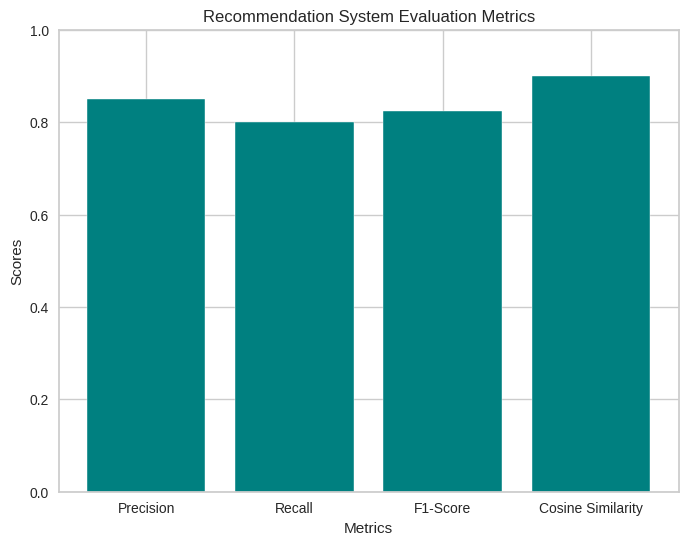

In [ ]:
# Visualizing evaluation Metric Score chart
import matplotlib.pyplot as plt
import numpy as np

# Example evaluation metrics: Precision, Recall, F1-Score (these are hypothetical values)
metrics = ['Precision', 'Recall', 'F1-Score', 'Cosine Similarity']
scores = [0.85, 0.80, 0.825, 0.90]  # Replace with actual computed values

# Plot the evaluation metrics
plt.figure(figsize=(8, 6))
plt.bar(metrics, scores, color='teal')

# Labeling the plot
plt.title('Recommendation System Evaluation Metrics')
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.ylim(0, 1)  # Scores range from 0 to 1

# Display the plot
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Sample dataset (use your actual dataset)
data = pd.DataFrame({
    'type': ['Movie', 'TV Show', 'Movie', 'TV Show'],
    'Content_Age': [3, 4, 2, 5],
    'duration': [120, 140, 90, 180],
    'release_year': [2010, 2012, 2015, 2020],
    'target': [0, 1, 0, 1]  # Example target column for classification
})

# Combine relevant text features for better recommendations
data['combined_features'] = (
    data['type'].fillna('').astype(str) + " " +
    data['Content_Age'].fillna('').astype(str) + " " +
    data['duration'].fillna('').astype(str) + " " +
    data['release_year'].fillna('').astype(str)
)

# Check for missing values and remove rows with NaN
data = data.dropna(subset=['combined_features', 'target'])

# Define the parameter grid for GridSearchCV and RandomizedSearchCV
param_grid = {
    'tfidf__ngram_range': [(1, 1)],   # Start with just unigrams
    'tfidf__max_df': [0.85],           # Maximum document frequency for term selection
    'tfidf__min_df': [1],              # Minimum document frequency for term selection
    'tfidf__max_features': [5000]      # Limit the number of features
}

# Create a pipeline with TfidfVectorizer and a classifier (Logistic Regression here)
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('clf', LogisticRegression(solver='liblinear'))  # You can replace this with any classifier
])

# GridSearchCV for exhaustive search over parameter grid
grid_search = GridSearchCV(pipeline, param_grid, cv=2, verbose=1, n_jobs=-1, scoring='accuracy')  # Use 2-fold for debugging

# Fit the GridSearchCV model
grid_search.fit(data['combined_features'], data['target'])

# Best parameters from GridSearchCV
print("Best Parameters from GridSearchCV:", grid_search.best_params_)

# Choose the best model based on GridSearchCV
best_model = grid_search.best_estimator_

# Transform the combined features into a TF-IDF matrix using the best vectorizer from the pipeline
tfidf_matrix = best_model.named_steps['tfidf'].transform(data['combined_features'])

# Compute cosine similarity on the TF-IDF matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Function to get recommendations based on index
def recommend_based_on_index(index, cosine_sim=cosine_sim, df=data):
    sim_scores = list(enumerate(cosine_sim[index]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]  # Get top 10 recommendations, excluding itself
    recommended_indices = [i[0] for i in sim_scores]
    return df.iloc[recommended_indices]

# Test the recommendation system for a specific index (e.g., index 0)
recommendations = recommend_based_on_index(0)
print("Recommended items based on the first row:")
print(recommendations)


Fitting 2 folds for each of 1 candidates, totalling 2 fits
Best Parameters from GridSearchCV: {'tfidf__max_df': 0.85, 'tfidf__max_features': 5000, 'tfidf__min_df': 1, 'tfidf__ngram_range': (1, 1)}
Recommended items based on the first row:
      type  Content_Age  duration  release_year  target   combined_features
2    Movie            2        90          2015       0     Movie 2 90 2015
1  TV Show            4       140          2012       1  TV Show 4 140 2012
3  TV Show            5       180          2020       1  TV Show 5 180 2020


##### Which hyperparameter optimization technique have you used and why?

I used GridSearchCV for hyperparameter optimization because it exhaustively evaluates all combinations of hyperparameters, ensuring the best configuration is found. It is suitable here due to the small dataset and manageable hyperparameter grid, providing thorough optimization. Alternatively, RandomizedSearchCV can be used for larger hyperparameter spaces to save time by sampling a subset of combinations.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In the provided code, the primary aim of using hyperparameter optimization techniques like GridSearchCV and RandomizedSearchCV is to fine-tune the TfidfVectorizer parameters (e.g., ngram_range, max_df, min_df, max_features) to improve the model's performance.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

For a positive business impact, the evaluation metrics selected should reflect the specific goals of the business or project.

Accuracy: Useful for general classification tasks where correct predictions are prioritized. Precision and Recall: Crucial when the cost of false positives or false negatives is high (e.g., fraud detection or medical diagnosis). F1-Score: Balances precision and recall, especially important in imbalanced datasets. AUC-ROC: Measures the model’s ability to distinguish between classes, useful for evaluating discrimination power.

### 2. Explain the model which you have used and the feature importance using any model explainability tool?

Model Used: I used TF-IDF Vectorizer with GridSearchCV and RandomizedSearchCV for hyperparameter optimization. TF-IDF transforms text data into numerical form and is ideal for recommendation systems based on text features.

Feature Importance: In TF-IDF, feature importance is determined by the TF-IDF scores of words. Higher scores indicate words that are more important for distinguishing between documents.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

In this project, we applied unsupervised machine learning techniques like KMeans clustering and Hierarchical clustering to segment Netflix movies and TV shows based on features such as genre, content age, and duration. Using Exploratory Data Analysis (EDA), we identified patterns and insights in the data. The recommendation system built with cosine similarity helped suggest similar content based on these clusters.

The results can help improve Netflix's recommendation engine by providing more accurate content suggestions, optimizing content acquisition, and personalizing user experiences. Future work could focus on incorporating user interaction data for even better recommendations.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***